In [1]:
from sklearn.cluster import KMeans

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import imageio
import numpy as np

c:\users\lizi\appdata\local\programs\python\python38-32\lib\site-packages\geopandas\_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  warnings.warn(


In [41]:
#Selecionando os dados
Dados = (r"C:\Users\Lizi\Python\K_Means\Dados\\")
Output = (r"C:\Users\Lizi\Python\K_Means\Output\\")
acidentes2018 = gpd.read_file(Dados+"ano_2018.shp")
poa_lim = gpd.read_file(Dados+"POA_lim.shp")
ruas = gpd.read_file(Dados+"eixos.shp")

In [42]:
#Selecionando apenas campos geo 
acidentes2018_ = acidentes2018[['longitude', 'latitude']]

acidentes2018_

,longitude,latitude
0,-51.134118,-30.229493
1,-51.205006,-30.046972
2,-51.188374,-29.995276
3,-51.203706,-30.003445
4,-51.216489,-30.030669
...,...,...
10067,-51.205571,-30.075954
10068,-51.198352,-30.046314
10069,-51.222197,-30.048023
10070,-51.218112,-30.142269


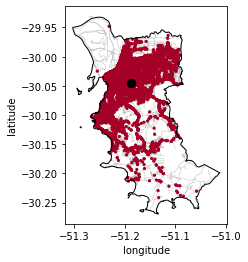

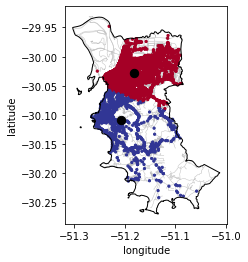

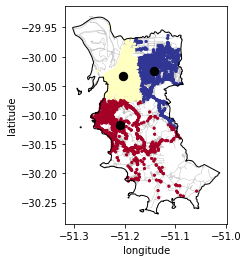

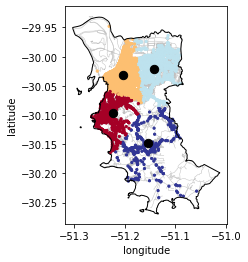

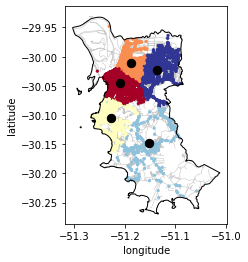

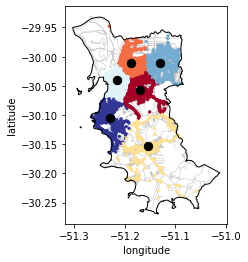

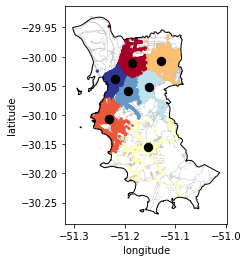

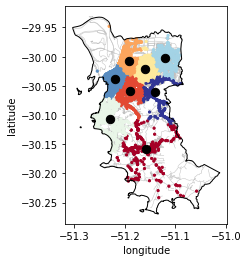

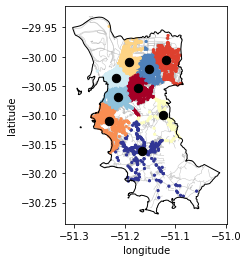

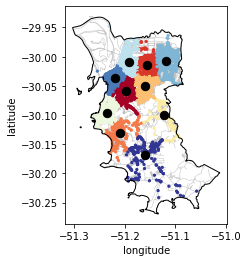

In [51]:
images = []
#Lista 1 para o laço
lista1 = list(range(1,11))
#Lista 2 para a legenda das imagens
lista2 = ['Número de clusters: '+ str(i) for i in lista1]
#Lista 3 para o nome de cada imagem
lista3 = [str(i) for i in lista1]

for i in lista1:
    
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    pred_y = kmeans.fit_predict(acidentes2018_)
    
    base = poa_lim.plot(color='None', edgecolor='black', zorder=10)
    ruas.plot(ax = base, color = 'silver', linewidth=0.5, zorder=5)    
    
    cm = plt.cm.get_cmap('RdYlBu')

    acidentes2018_.plot.scatter(x='longitude', y='latitude', s=5, ax = base, zorder=8, cmap=cm, c=pred_y, colorbar=None)
    
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='black', zorder=15)
    plt.show()

    
    base.annotate(lista2[i-1],
    xy=(.1, .1), xycoords='figure fraction',
    horizontalalignment='left', rotation=90, verticalalignment='bottom',
    fontsize=14)
      
    filepath = os.path.join(Output, lista3[i-1] +'_Clusters.jpg')
    chart = base.get_figure()
    chart.savefig(filepath, dpi=300)
        
    images.append(imageio.imread(filepath))
    imageio.mimsave('Output'+'\kmeans.gif', images, fps=1)